In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
%matplotlib inline
import scipy
import scipy.stats as st 

import matplotlib.patches as mpatches
#scale_fill_manual(values = c("#FF523F","#FFAD33", "#198D6D","#6599FF", "#683b96")) +
colorDic = {"blue" : "#FF523F", "yellow" : "#FFAD33",  "purple": "#198D6D", "green" : "#6599FF", "red" : "#683b96"}
colors = list(colorDic.values())

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [3]:
df = pd.read_csv("./data/data_for_python.csv")

df = df.rename(columns={"method": "Method", "condition":"Artefact"})
df.Method = df.Method.replace("online", "Online").replace("in-situ", "In-Situ")

In [4]:
df[['AD_PQ', 'AD_HQI', 'AD_HQS', 'AD_ATT', 'AD_HQ']].describe()

,AD_PQ,AD_HQI,AD_HQS,AD_ATT,AD_HQ
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,4.780357,5.130952,5.810119,4.579762,5.470536
std,0.823076,0.946540,0.929915,0.655578,0.893842
min,1.714286,1.000000,1.571429,1.857143,1.285714
25%,4.285714,4.714286,5.428571,4.142857,5.071429
50%,4.857143,5.285714,6.000000,4.571429,5.571429
75%,5.321429,5.714286,6.428571,5.000000,6.071429
max,6.714286,7.000000,7.571429,6.285714,7.071429


In [5]:


#Score auf -3 bis 3 bringen!
for c in ['AD_PQ', 'AD_HQI', 'AD_HQS', 'AD_ATT', 'AD_HQ']:
    df[c] = df[c]-4
    
dfGroup = df.groupby("Method").mean()
dfGroup

,ID,userID,timeStamp,duration,FINAL_01,FINAL_02,ARI_01,ARI_02,ARI_03,ARI_04,...,Q1-duration,Q2-duration,Q3-duration,SUS_Score,ARI_Score,AD_PQ,AD_HQI,AD_HQS,AD_ATT,AD_HQ
Method,,,,,,,,,,,,,,,,,,,,,
AR,108.104167,5.531635e+13,1.535780e+12,226042.250000,2.270833,0.416667,0.729167,1.145833,0.729167,0.395833,...,80739.645833,96578.562500,71794.583333,5.925000,4.424603,0.782738,1.419643,1.949405,0.627976,1.684524
In-Situ,171.812500,4.344114e+13,1.535978e+12,263034.375000,2.562500,1.166667,1.312500,1.520833,1.354167,1.250000,...,96151.333333,106426.895833,97403.770833,6.056250,5.157738,1.130952,1.366071,2.125000,0.785714,1.745536
Lab,73.666667,4.828192e+13,1.535712e+12,208252.250000,2.750000,0.812500,0.562500,1.250000,0.875000,0.729167,...,109367.437500,127711.270833,124313.520833,6.108333,4.840278,0.294643,0.348214,1.169643,0.223214,0.758929
Online,288.187500,5.560859e+13,1.536695e+12,58071.000000,2.083333,-0.250000,0.104167,0.229167,-0.229167,-0.812500,...,112998.770833,147713.145833,73572.437500,5.654167,4.033730,0.633929,1.101190,1.666667,0.425595,1.383929
VR,144.145833,4.779219e+13,1.535859e+12,276708.916667,2.562500,0.812500,1.312500,1.479167,1.000000,1.125000,...,84325.208333,99689.312500,116159.125000,6.014583,5.037698,1.059524,1.419643,2.139881,0.836310,1.779762


In [6]:
dfGroup = df.groupby("Method").std()
x = dfGroup[["AD_PQ","AD_HQI" ,"AD_HQS", "AD_ATT"]].T
x = x.round(2)
x

Method,AR,In-Situ,Lab,Online,VR
AD_PQ,0.71,0.66,0.94,0.80,0.72
AD_HQI,1.01,0.62,0.89,1.01,0.70
AD_HQS,0.78,0.71,1.08,1.03,0.64
AD_ATT,0.68,0.50,0.63,0.59,0.67


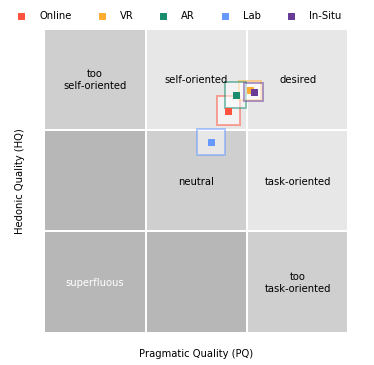

In [7]:

# Create figure and axes
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Create a Rectangle patch
rects =[]
rects.append(patches.Rectangle((-3,-3),6,6,linewidth=5,facecolor='#FF00FF', edgecolor='w'))
rects.append(patches.Rectangle((-3,-3),2,2,linewidth=2,facecolor='#b7b7b7', edgecolor='w'))
rects.append(patches.Rectangle((-1,-3),2,2,linewidth=2,facecolor='#b7b7b7', edgecolor='w'))
rects.append(patches.Rectangle((-3,-1),2,2,linewidth=2,facecolor='#b7b7b7', edgecolor='w'))

rects.append(patches.Rectangle((-1,-1),2,2,linewidth=2,facecolor='#cfcfcf', edgecolor='w'))
rects.append(patches.Rectangle((1,-3),2,2,linewidth=2,facecolor='#cfcfcf', edgecolor='w'))
rects.append(patches.Rectangle((-3,1),2,2,linewidth=2,facecolor='#cfcfcf', edgecolor='w'))

rects.append(patches.Rectangle((1,1),2,2,linewidth=2,facecolor='#e7e7e7', edgecolor='w'))
rects.append(patches.Rectangle((1,-1),2,2,linewidth=2,facecolor='#e7e7e7', edgecolor='w'))
rects.append(patches.Rectangle((-1,1),2,2,linewidth=2,facecolor='#e7e7e7', edgecolor='w'))
# Add the patch to the Axes
for rect in rects:
    ax.add_patch(rect)



ax.text(-2, -2, 'superfluous', horizontalalignment='center', verticalalignment='center', color="w")
ax.text(-2, 2, 'too\nself-oriented', horizontalalignment='center', verticalalignment='center')
ax.text(0, 2, 'self-oriented', horizontalalignment='center', verticalalignment='center')
ax.text(0, 0, 'neutral', horizontalalignment='center', verticalalignment='center')
ax.text(2, 2, 'desired', horizontalalignment='center', verticalalignment='center')
ax.text(2, 0, 'task-oriented', horizontalalignment='center', verticalalignment='center')
ax.text(2, -2, 'too\ntask-oriented', horizontalalignment='center', verticalalignment='center')

for i, m in enumerate(['Online', 'VR', 'AR', 'Lab', 'In-Situ']):
    xM, x1,x2 = mean_confidence_interval(df[df.Method == m].AD_PQ)
    yM, y1,y2 = mean_confidence_interval(df[df.Method == m].AD_HQ)
    rect = patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2, ls="-", facecolor="#ffffffff", edgecolor=colors[i], alpha=0.5)
    ax.add_patch(rect)
    plt.scatter(xM, yM, marker="s", s = 30, zorder = 10, c=colors[i], label=m)


plt.xlabel("Pragmatic Quality (PQ)")
plt.ylabel("Hedonic Quality (HQ)")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,  # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axis('equal')
leg = plt.legend(loc=9, ncol=5, bbox_to_anchor=(0.44,1.05), frameon=False)

plt.savefig("./out/attrakdiff.pdf", bbox_inches='tight', pad_inches=0)
plt.show()